### 데이터 가져오기

In [4]:
import warnings

warnings.filterwarnings(action='ignore')

from shutil import copyfileobj
from six.moves import urllib
from sklearn import datasets
import os
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def fetch_mnist(data_home=None):
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    data_home = datasets.get_data_home(data_home=data_home)
    
    data_home = os.path.join(data_home, 'mldata')
    if not os.path.exists(data_home):
        os.makedirs(data_home)
    mnist_save_path = os.path.join(data_home, "mnist-original.mat")
    if not os.path.exists(mnist_save_path):
        mnist_url = urllib.request.urlopen(mnist_alternative_url)
        with open(mnist_save_path, "wb") as matlab_file:
            copyfileobj(mnist_url, matlab_file)

fetch_mnist()

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

c:\python\venv\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
c:\python\venv\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [2]:
X,y=mnist["data"],mnist["target"]

print("train data : ",X.shape) #28x28
print("label data : ",y.shape)

train data :  (70000, 784)
label data :  (70000,)


### 28x28 형태로 reshape

5.0


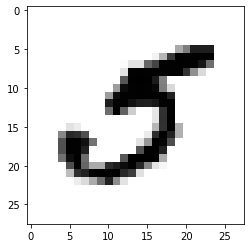

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

index=36000

some_digit=X[index]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")

print(y[index])

### train set과 test set을 나눈다

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### train set의 Index를 섞음

In [5]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### 5가 나오는 경우만 true

In [6]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### 확률적 경사 하강법 사용

In [11]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=5, random_state=42)
sgd.fit(X_train, y_train_5)

c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### 값 예측 predict

In [12]:
sgd.predict([some_digit])

array([ True])

### fold를 3개로 나누고 교차검증을 한다.

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.94645


c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.9628
0.94215


c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, X_train, y_train_5, cv=3, scoring="accuracy")

c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.94645, 0.9628 , 0.94215])

### 5가 아닌 것을 분류

In [17]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator): #5가 아닌것을 찾는 추정기
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

### 위 코드를 사용해 k를 3으로 분할해 교차검증

In [18]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91015, 0.9102 , 0.9086 ])

In [35]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd, X_train, y_train_5, cv=3)

c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


### 결과의 confusion_matrix 출력

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53383,  1196],
       [ 1776,  3645]], dtype=int64)

In [23]:
from sklearn.metrics import precision_score, recall_score

print("precision:", precision_score(y_train_5,y_train_pred))
print("recall:",recall_score(y_train_5, y_train_pred))

precision: 0.7529436066928321
recall: 0.6723851687880464


### 정밀도와 재현율을 하나로 만듦

In [24]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7103878386279477

In [25]:
y_scores = sgd.decision_function([some_digit])
y_scores

array([1097.22241413])

### threshold의 크기를 다르게 설정해봄

In [26]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [28]:
threshold=200000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

### 임계값을 다르게 설정함 (작은것부터 시작해 큰것까지 설정)

In [30]:
y_scores = cross_val_predict(sgd, X_train, y_train_5, cv=3,method="decision_function")

c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [31]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

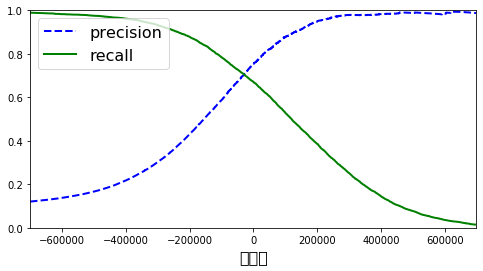

In [34]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="recall", linewidth=2)
    plt.xlabel("임계값", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

###  recall에 대한 precision의 곡선을 그림

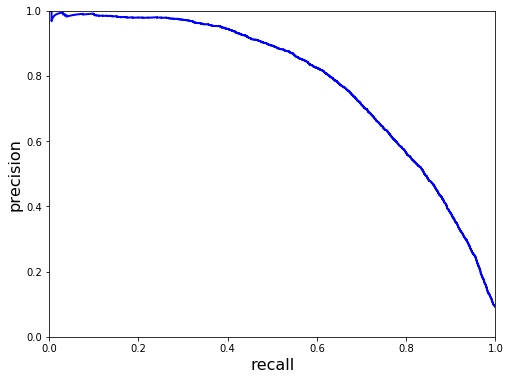

In [37]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("recall", fontsize=16)
    plt.ylabel("precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### 70000 이상일 때 정확도를 구함

In [38]:
y_train_pred_90=(y_scores>70000)

In [40]:
precision_score(y_train_5,y_train_pred_90)

0.8452380952380952

In [41]:
recall_score(y_train_5,y_train_pred_90)

0.5762774395867921

###

### 특이도에 -1을 해서 그린 그래프
### FPR : 양성으로 잘못 분류된 음성 샘플의 비율(1 - TNR),TNR : 특이도


In [42]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

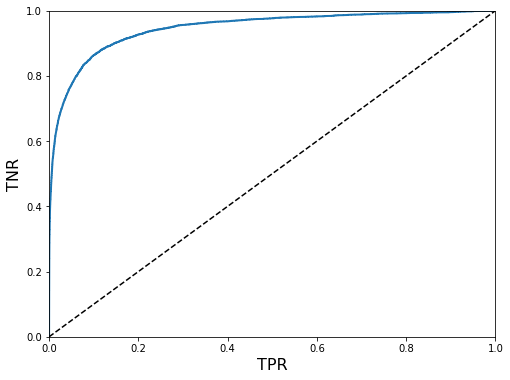

In [45]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('TPR', fontsize=16)
    plt.ylabel('TNR', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [46]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9461363322062374

### SGD의 ROC 곡선과 ROC AUC를 비교
### predict_proba는 확률을 반환

In [48]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest, X_train, y_train_5, cv=3,method="predict_proba")

In [49]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

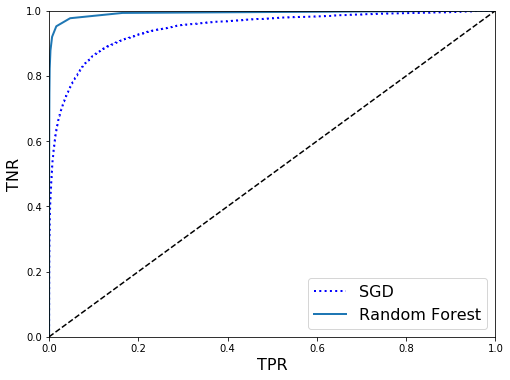

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [51]:
roc_auc_score(y_train_5,y_scores_forest)

0.9925063986711937

### 다중분류 일대다(OvA)방법 사용

In [52]:
sgd.fit(X_train, y_train)
sgd.predict([some_digit])

c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([5.])

In [53]:
some_digit_scores = sgd.decision_function([some_digit])
some_digit_scores

array([[-130903.29090604, -547801.74467564, -376838.9067612 ,
        -137870.48965664, -541032.61568392,  131466.24145039,
        -796213.48627565, -329370.40782906, -711691.34309573,
        -525698.12610792]])

In [54]:
np.argmax(some_digit_scores)

5

In [56]:
sgd.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [57]:
sgd.classes_[5]

5.0

### 강제로 일대다(OvA) 일대일(OvO) 사용

In [58]:
from sklearn.multiclass import OneVsOneClassifier
ovo = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo.fit(X_train, y_train)
ovo.predict([some_digit])

c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\python\venv\tensorflow\lib\site-packa

array([5.])

In [62]:
len(ovo.estimators_)

45

### 랜덤포레스트로 돌림(5가 잘 나옴)

In [63]:
forest.fit(X_train, y_train)
forest.predict([some_digit])

array([5.])

In [64]:
forest.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

### 분류기 평가 (교차검증을 이용) 스케일을 조정해 정확도를 높임

In [65]:
cross_val_score(sgd, X_train, y_train, cv=3, scoring="accuracy")

c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.86377724, 0.87534377, 0.85072761])

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd, X_train_scaled, y_train, cv=3, scoring="accuracy")

c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.90761848, 0.90864543, 0.91243687])

### 에러분석 (10개를 분류하기 떄문에 크기가 커짐 10x10이 됨)

In [67]:
y_train_pred = cross_val_predict(sgd, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\python\venv\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5752,    3,   16,   10,   11,   42,   42,    7,   38,    2],
       [   2, 6476,   44,   25,    7,   40,    6,   11,  119,   12],
       [  57,   39, 5315,   95,   88,   29,   94,   55,  170,   16],
       [  54,   40,  135, 5336,    3,  246,   35,   56,  132,   94],
       [  22,   27,   31,    7, 5380,   13,   53,   28,   86,  195],
       [  80,   44,   32,  172,   83, 4608,  113,   27,  163,   99],
       [  32,   26,   47,    2,   41,   92, 5624,    7,   46,    1],
       [  28,   16,   67,   33,   63,   11,    6, 5790,   17,  234],
       [  53,  146,   74,  153,   18,  166,   56,   30, 5009,  146],
       [  45,   33,   26,   85,  170,   31,    2,  197,   76, 5284]],
      dtype=int64)

### 흰색이 잘 분류된것, 시각화함

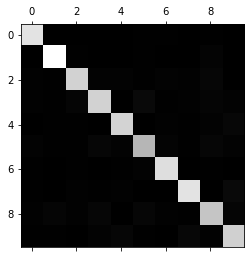

In [68]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

### 각 에러 비율을 비교(3,5는 비교하기 어렵다는 것을 알수 있음)

In [69]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

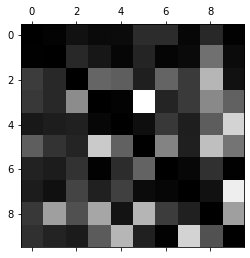

In [70]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

### 숫자 그림을 보기 위한 함수

In [71]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

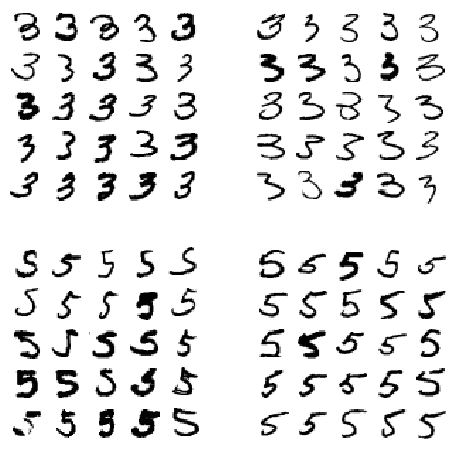

In [72]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

### 다중 레이블 분류 (KNeighborsClassifier인스턴스를 만들고 다중 타겟 배열을 사용해 훈련)
### 숫자 5의 크기와 홀수 짝수 여부가 올바르게 출력됨(False,True)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn = KNeighborsClassifier()
knn.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [74]:
knn.predict([some_digit])

array([[False,  True]])

### 다중 출력 분류

In [77]:
noise=np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

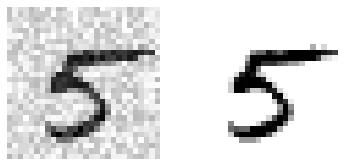

In [78]:
def plot_digit(data):
    image=data.reshape(28,28)
    plt.imshow(image,cmap=matplotlib.cm.binary,interpolation="nearest")
    plt.axis("off")

some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

### 실제로 분류된 결과

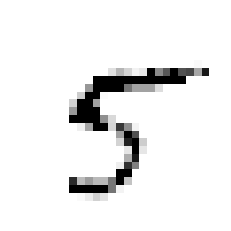

In [80]:
knn.fit(X_train_mod,y_train_mod)
clean_digit=knn.predict([X_test_mod[some_index]])
plot_digit(clean_digit)